# Tarea 2 - Joan Jácome Delgado
## Función 1

#### Graficar los tiempos que tarda en ejecutar la función $2^n$ con valores $n$ de [0:25]

In [1]:
import numpy as np
import ipyparallel as ipp
%matplotlib inline

In [2]:
c = ipp.Client()
c.ids

[0, 1, 2, 3]

In [3]:
dview = c[:]

In [4]:
def Func(n):
    import numpy as np
    x = 2**n
    for i in np.arange(int(x**0.5)+1):
        x%i

C:\Users\Joan\Anaconda2\lib\site-packages\dateutil\parser.py:605: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif res.tzname and res.tzname in time.tzname:


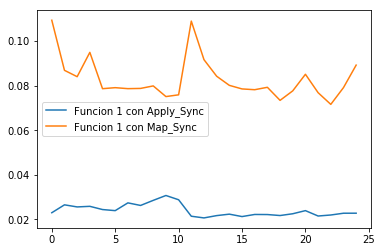

In [5]:
import timeit

func1b = []
func1a = []

for i in np.arange(25):
    start= timeit.default_timer()
    dview.map_sync(Func, range(25))
    func1b.append(timeit.default_timer() - start)

for i in np.arange(25):
    start= timeit.default_timer()
    c[0].apply_sync(Func, 2**i)
    func1a.append(timeit.default_timer() - start)

import matplotlib.pyplot as plt
plt.plot(func1a, label = "Funcion 1 con Apply_Sync")
plt.plot(func1b, label = "Funcion 1 con Map_Sync")
plt.legend(loc="best")
plt.show()

## PrimeQA

#### Graficar los tiempos que tarda en ejecutar la función PrimeQA($n$) con valores $n$ de [0:25]

In [6]:
def PrimeQA(x):
    import numpy as np
    return all(x % i for i in np.arange(int(x**0.5)+1)[2:])

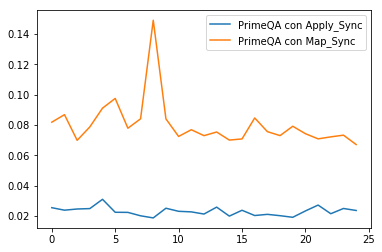

In [7]:
import timeit

func2a = []
func2b = []

for i in np.arange(25):
    start= timeit.default_timer()
    c[0].apply_sync(PrimeQA, 2**i)
    func2a.append(timeit.default_timer() - start)

for i in np.arange(25):
    start= timeit.default_timer()
    dview.map_sync(PrimeQA, range(25))
    func2b.append(timeit.default_timer() - start)


import matplotlib.pyplot as plt
plt.plot(func2a, label = "PrimeQA con Apply_Sync")
plt.plot(func2b, label = "PrimeQA con Map_Sync")
plt.legend(loc="best")
plt.show()

# PrimeQB

#### Graficar los tiempos que tarda en ejecutar la función PrimeQA($n$) con valores $n$ de [0:25]

In [8]:
def PrimeQB(x):
    import numpy as np
    return np.all(np.array([x % i for i in np.arange(np.int(x**0.5)+1)[2:]]))

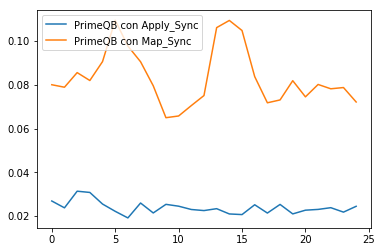

In [9]:
import timeit

func3a = []
func3b = []

for i in np.arange(25):
    start= timeit.default_timer()
    c[0].apply_sync(PrimeQB, 2**i)
    func3a.append(timeit.default_timer() - start)

for i in np.arange(25):
    start= timeit.default_timer()
    dview.map_sync(PrimeQB, range(25))
    func3b.append(timeit.default_timer() - start)

import matplotlib.pyplot as plt
plt.plot(func3a, label = "PrimeQB con Apply_Sync")
plt.plot(func3b, label = "PrimeQB con Map_Sync")
plt.legend(loc="best")
plt.show()

# PrimeQC

#### Graficar los tiempos que tarda en ejecutar la función PrimeQA($n$) con valores $n$ de [0:25]

In [10]:
def PrimeQC(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    residuos = np.mod(x,lista)
    return np.all(residuos)

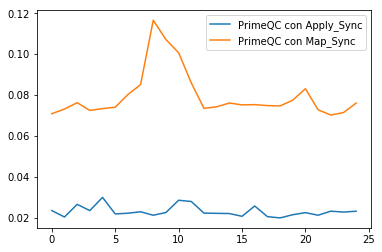

In [11]:
import timeit

func4a = []
func4b = []

for i in np.arange(25):
    start= timeit.default_timer()
    c[0].apply_sync(PrimeQC, 2**i)
    func4a.append(timeit.default_timer() - start)

for i in np.arange(25):
    start= timeit.default_timer()
    dview.map_sync(PrimeQC,range(25))
    func4b.append(timeit.default_timer() - start)


import matplotlib.pyplot as plt
plt.plot(func4a, label = "PrimeQC con Apply_Sync")
plt.plot(func4b, label = "PrimeQC con Map_Sync")
plt.legend(loc="best")
plt.show()

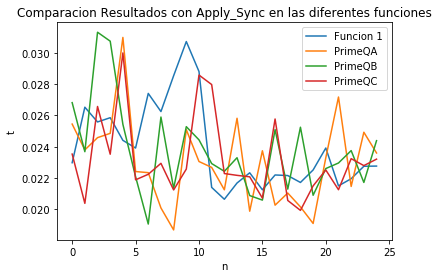

In [12]:
plt.title("Comparacion Resultados con Apply_Sync en las diferentes funciones")
plt.plot(func1a, label = "Funcion 1") 
plt.plot(func2a, label = "PrimeQA")
plt.plot(func3a, label = "PrimeQB")
plt.plot(func4a, label = "PrimeQC")
plt.legend(loc="best") 
plt.xlabel("n")
plt.ylabel("t")
plt.show()

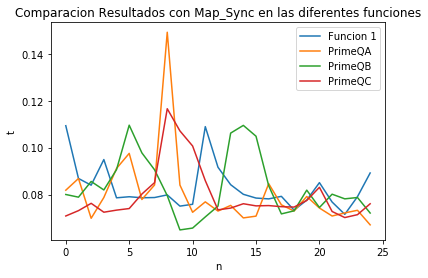

In [13]:
plt.title("Comparacion Resultados con Map_Sync en las diferentes funciones")
plt.plot(func1b, label = "Funcion 1") 
plt.plot(func2b, label = "PrimeQA")
plt.plot(func3b, label = "PrimeQB")
plt.plot(func4b, label = "PrimeQC")
plt.legend(loc="best") 
plt.xlabel("n")
plt.ylabel("t")
plt.show()